In [6]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_dirs = ["/home/luca/raspicar/data/29-04-2024_15-16-45",
             "/home/luca/raspicar/data/29-04-2024_15-19-54",
             "/home/luca/raspicar/data/29-04-2024_15-22-37",
             "/home/luca/raspicar/data/29-04-2024_15-18-25",
             "/home/luca/raspicar/data/29-04-2024_15-21-09",
             "/home/luca/raspicar/data/29-04-2024_15-23-31",
             "/home/luca/raspicar/data/29-04-2024_15-33-14",
             "/home/luca/raspicar/data/29-04-2024_15-33-54",
             "/home/luca/raspicar/data/29-04-2024_15-34-44",
             "/home/luca/raspicar/data/29-04-2024_15-35-14",
             "/home/luca/raspicar/data/29-04-2024_15-35-48",
             "/home/luca/raspicar/data/29-04-2024_15-36-14",
             "/home/luca/raspicar/data/29-04-2024_15-36-56",
             "/home/luca/raspicar/data/29-04-2024_15-37-34",
             "/home/luca/raspicar/data/29-04-2024_15-38-15",
             "/home/luca/raspicar/data/29-04-2024_15-33-31",
             "/home/luca/raspicar/data/29-04-2024_15-34-18",
             "/home/luca/raspicar/data/29-04-2024_15-34-58",
             "/home/luca/raspicar/data/29-04-2024_15-35-36",
             "/home/luca/raspicar/data/29-04-2024_15-36-00",
             "/home/luca/raspicar/data/29-04-2024_15-36-32",
             "/home/luca/raspicar/data/29-04-2024_15-37-14",
             "/home/luca/raspicar/data/29-04-2024_15-37-49",
             "/home/luca/raspicar/data/29-04-2024_16-22-36",
             "/home/luca/raspicar/data/29-04-2024_16-23-27",
             "/home/luca/raspicar/data/29-04-2024_16-24-28",
             "/home/luca/raspicar/data/29-04-2024_16-25-28",
             "/home/luca/raspicar/data/29-04-2024_16-26-16",
             "/home/luca/raspicar/data/29-04-2024_16-27-14"
             ]



In [7]:
def resize_and_crop_image(image, target_width=200, target_height=66):
    # Check input image dimensions
    if len(image.shape) < 2:
        raise ValueError("Invalid image data!")

    height, width = image.shape[:2]

    # Calculate scaling factor to maintain aspect ratio based on width
    scaling_factor = target_width / width
    new_width = int(width * scaling_factor)
    new_height = int(height * scaling_factor)
    resized_image = cv2.resize(image, (new_width, new_height))

    # Check if the new height is greater than or equal to the target height before cropping
    if new_height < target_height:
        raise ValueError("Resized image height is less than the target crop height.")

    # Calculate start y-coordinate for cropping to center the crop area
    y_start = new_height - target_height

    cropped_image = resized_image[y_start:y_start + target_height, 0:target_width]
    return cropped_image

def load_images_and_labels(data_dirs):
    labels = []
    images = []
    for dir in data_dirs:
        filenames = os.listdir(dir)
        for filename in filenames:
            if filename.endswith('.jpg'):
                path = os.path.join(dir, filename)
                image = cv2.imread(path)
                if image is not None:
                    image = resize_and_crop_image(image)
                    images.append(None)
                    labels.append(float(filename.split('_')[1].replace('.jpg', '')))
    return np.array(images), np.array(labels)




In [8]:
def plot_steering_angle_distribution(angles, bins=21, title='Distribution of Steering Angles'):
    """
    Plots the distribution of steering angles.

    Args:
    - angles (list or numpy array): The list or array containing the steering angles.
    - bins (int): Number of bins in the histogram.

    """

    # Calculating statistics
    mean_angle = np.mean(angles)
    variance_angle = np.var(angles)
    
    # Printing statistics
    print("Number of Images: ", len(angles))
    print(f"Mean of Steering Angles: {mean_angle:.2f}")
    print(f"Variance of Steering Angles: {variance_angle:.2f}")
    
    plt.figure(figsize=(10, 6))
    counts, bin_edges, _ = plt.hist(angles, bins=bins, alpha=0.7, color='blue')
    plt.title(title)
    plt.xlabel('Steering Angle')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Adding text labels above bars
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Calculate bin centers
    for count, x in zip(counts, bin_centers):
        # Only put text above bars with counts more than 0 to avoid clutter
        if count > 0:
            plt.text(x, count, str(int(count)), ha='center', va='bottom')

    plt.savefig(title+".svg")
    plt.show()

## Plot Overall Data Distribution

Number of Images:  5633
Mean of Steering Angles: 0.08
Variance of Steering Angles: 0.28


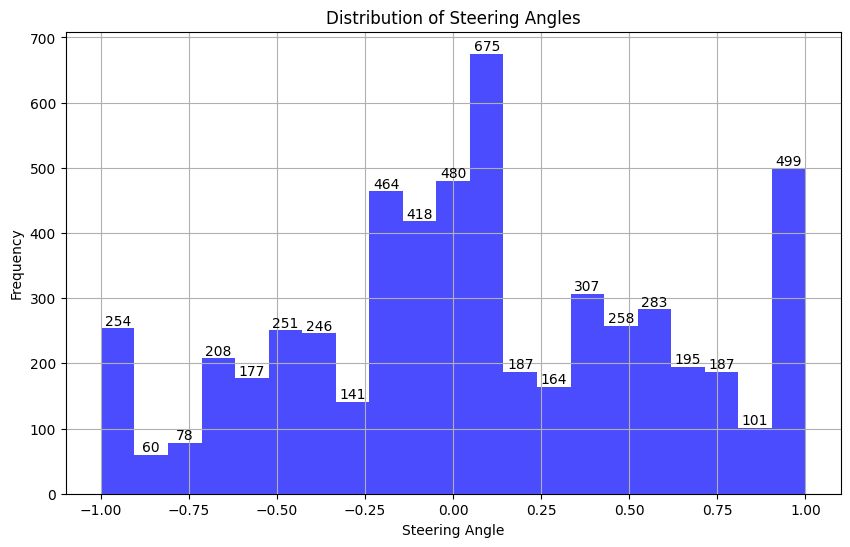

In [9]:

images, labels = load_images_and_labels(data_dirs)
plot_steering_angle_distribution(labels,title='Distribution of Steering Angles')

## Plot Training and Test Data Distribution

Number of training samples: 4506
Number of validation samples: 1127
Number of Images:  4506
Mean of Steering Angles: 0.08
Variance of Steering Angles: 0.28


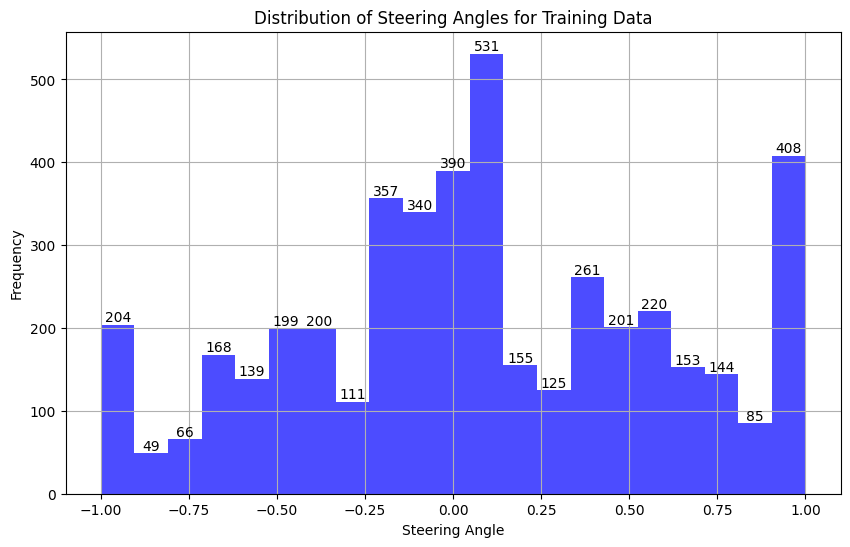

Number of Images:  1127
Mean of Steering Angles: 0.07
Variance of Steering Angles: 0.27


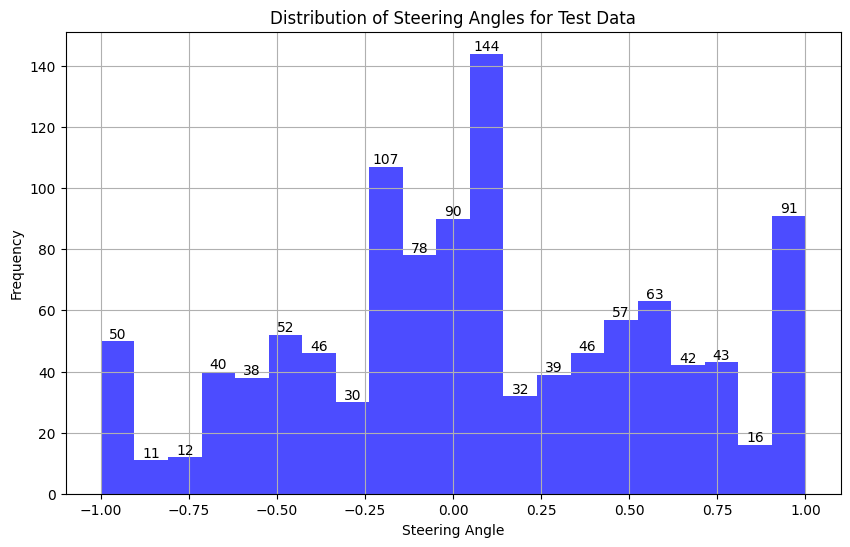

In [10]:
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2,
                                                                      random_state=42)
print(f"Number of training samples: {len(train_images)}")
print(f"Number of validation samples: {len(val_images)}")

plot_steering_angle_distribution(train_labels, title = 'Distribution of Steering Angles for Training Data')

plot_steering_angle_distribution(val_labels, title = 'Distribution of Steering Angles for Test Data')

# Generate a sequence of Images

In [22]:

def load_images_and_labels(data_dir):
    """
    Load images and their labels from a specified directory, and return sorted by labels.

    Args:
    - data_dir (str): Path to the dataset directory.
    - num_images (int): Number of images to load and display.

    Returns:
    - list of tuples: Sorted list of (image, label) tuples.
    """
    filenames = os.listdir(data_dir)
    images_labels = []
    for filename in filenames:
        if filename.endswith('.jpg'):
            path = os.path.join(data_dir, filename)
            image = cv2.imread(path)
            if image is not None:
                number = int(filename.split('_')[0])  # Extracting the number from filename
                image = resize_and_crop_image(image)  # Assuming you have this function defined elsewhere
                label = float(filename.split('_')[1].replace('.jpg', ''))
                images_labels.append((number, image, label))
    # Sort images by the image number (the first element of each tuple)
    images_labels.sort(key=lambda x: x[0])

    # Select the first `num_images` entries and remove the number part
    return [(img, lbl) for _, img, lbl in images_labels[0:-1]]


             
def plot_images(images_labels):
    """
    Plot images in a 4x4 grid.

    Args:
    - images_labels (list of tuples): Each tuple contains (image, label).
    """
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(images_labels, 1):
        plt.subplot(4, 4, i)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.title(f'Steering Angle: {label:.2f}')
        plt.axis('off')
        
    plt.subplots_adjust(left=0.01,
            bottom=0.01, 
            right=0.99, 
            top=0.5, 
            wspace=0.02, 
            hspace=0.02)
    plt.savefig("/home/luca/raspicar/Notebooks/lateral_sequence.png", bbox_inches='tight', pad_inches=0.1)
    plt.show()
    



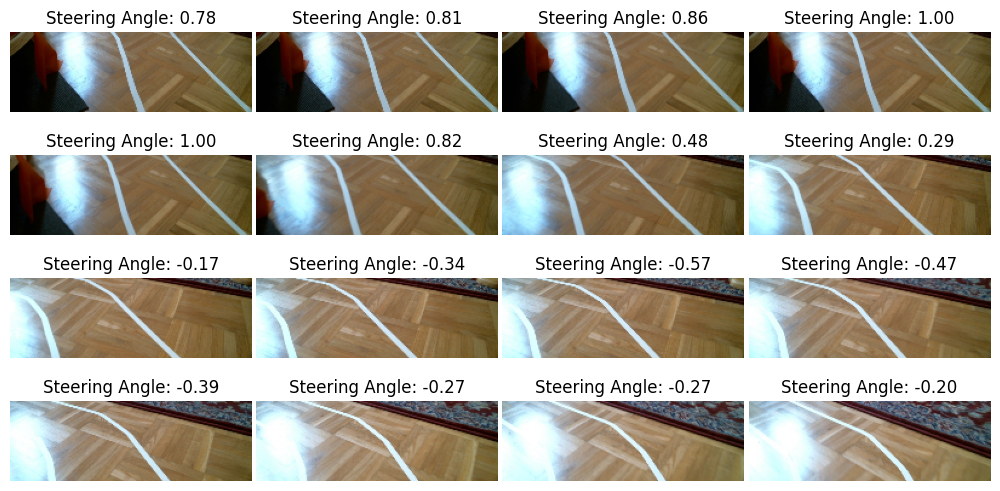

In [23]:


image_labels = load_images_and_labels("/home/luca/raspicar/data/29-04-2024_15-37-34")
plot_images(image_labels[0:16])

Text(0.5, 1.0, 'Steering Output over Time while Collecting Data')

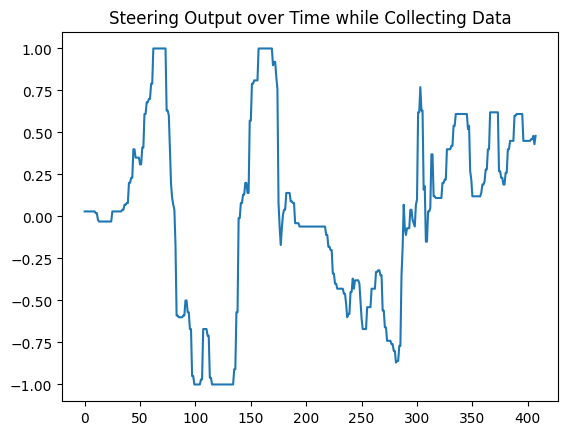

In [36]:
#image_labels = load_images_and_labels("/home/luca/raspicar/data/30-04-2024_13-44-21") 
image_labels = load_images_and_labels("/home/luca/raspicar/data/30-04-2024_13-45-32") 

label_list = []
for i, (image, label) in enumerate(image_labels, 1):
    label_list.append(label)
plt.plot(label_list)
plt.title("Steering Output over Time while Collecting Data")